In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os

In [9]:
groups = {"LDA": 0, "Sigmoid": 1, "Centroid": 2, "Gradient": 3, "ExtraTree":4}
labels = ["LDA", "Sigmoid", "Centroid", "Gradient", "ExtraTree"]
dir = "experiment3/finalgraphs"

MAE_matrix = np.zeros((5,5))
MAE_stdev = np.zeros((5,5))
CI_matrix = np.zeros((5,5))
CI_stdev = np.zeros((5,5))
CI_sizes = np.zeros((5,5))
CI_sizes_stdev = np.zeros((5,5))

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        file_dir = f"experiment3/trained{trained_on}/eval{eval_on}/aggregate_augment/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        print(trained_on + eval_on + lines[1])
        
        MAE_info = lines[1]
        percent_CI_info = lines[3]
        
        x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
        MAE = float(x)
        
        stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
        stdev = float(stdev)
        
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        percent_in_CI = eval(lines[2])
        percent_in_CI = [i * 100 for i in percent_in_CI]
        avg = np.average(percent_in_CI)
        stdev = np.std(percent_in_CI)
        
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        sizes = eval(lines[4])
        avg = np.average(sizes)
        stdev = np.std(sizes)
        
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

print(MAE_matrix)

pass

LDALDAMean absolute errors. avg:0.05448337128148728, stdev:0.07481319161033399

LDASigmoidMean absolute errors. avg:0.11088518895322204, stdev:0.13484475920238995

LDACentroidMean absolute errors. avg:0.06947271542476252, stdev:0.09615513236920842

LDAGradientMean absolute errors. avg:0.046005951487300245, stdev:0.06128362994637789

LDAExtraTreeMean absolute errors. avg:0.07536047056863618, stdev:0.09555464697531568

SigmoidLDAMean absolute errors. avg:0.1434969577222201, stdev:0.11254011066347593

SigmoidSigmoidMean absolute errors. avg:0.07625264025681144, stdev:0.08774779347587959

SigmoidCentroidMean absolute errors. avg:0.0879055052715886, stdev:0.0928938294880256
SigmoidGradientMean absolute errors. avg:0.1664852562620529, stdev:0.1215083442547985

SigmoidExtraTreeMean absolute errors. avg:0.12056616839128476, stdev:0.09322251440763314

CentroidLDAMean absolute errors. avg:0.08777750929049886, stdev:0.07013728807219721

CentroidSigmoidMean absolute errors. avg:0.07034753891932141

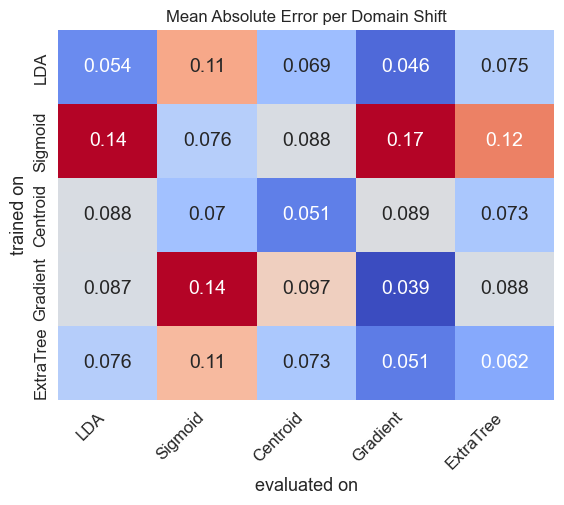

In [10]:
plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            annot_kws={"size": 14},
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plot.xaxis.label.set_size(13)
plot.yaxis.label.set_size(13)

name = "Mean Absolute Error per Domain Shift"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

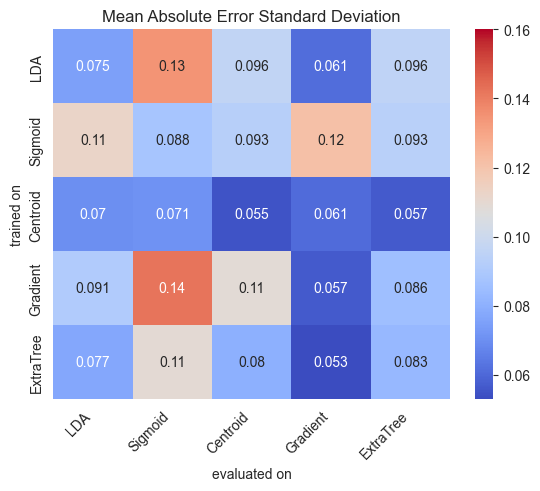

In [7]:
plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_25480\1807750150.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


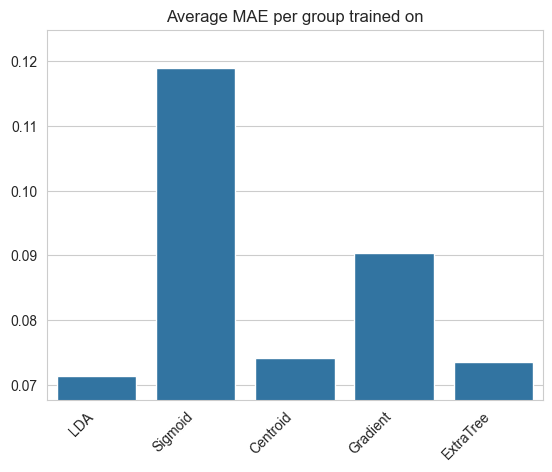

In [8]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_25480\2552758926.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


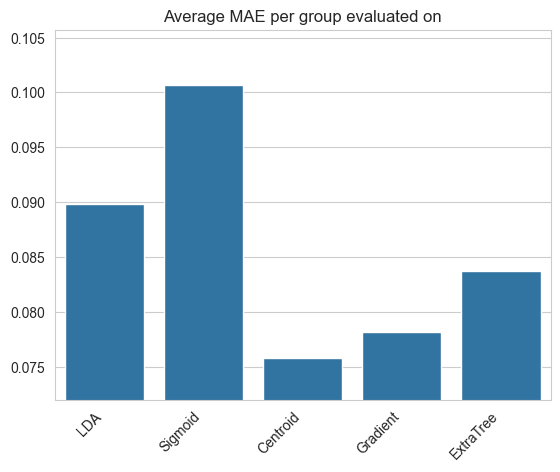

In [9]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group evaluated on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

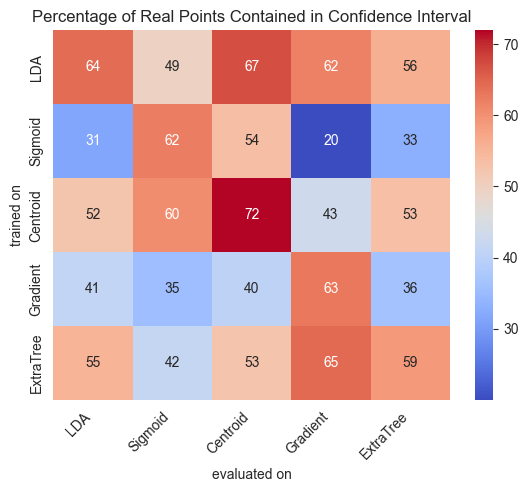

In [10]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Percentage of Real Points Contained in Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

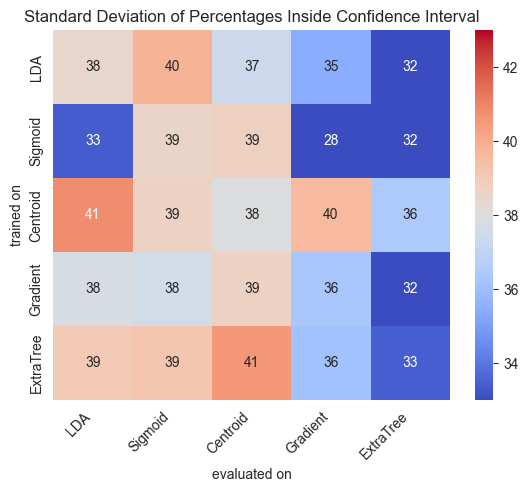

In [11]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Percentages Inside Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

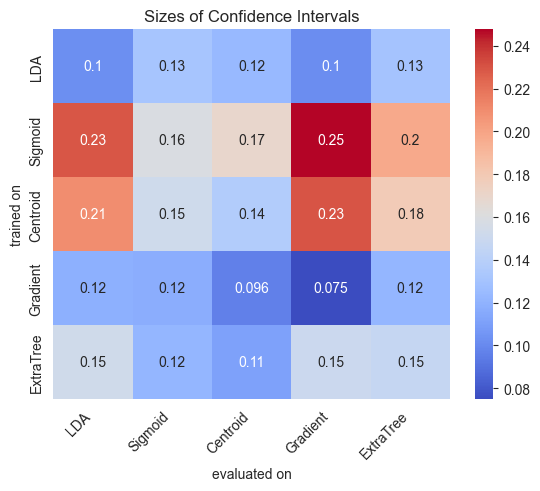

In [12]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

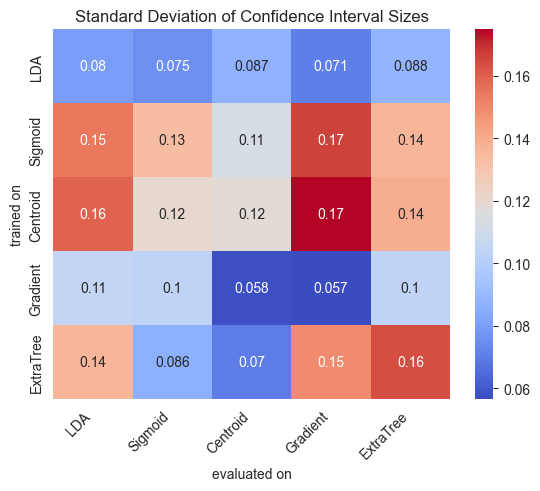

In [13]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Confidence Interval Sizes"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_25480\540695433.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


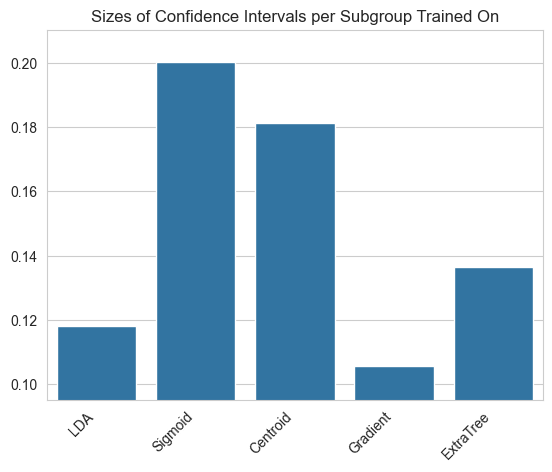

In [14]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals per Subgroup Trained On"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

[[ 0.          0.05640182  0.01498934 -0.00847742  0.0208771 ]
 [ 0.06724432  0.          0.01165287  0.09023262  0.04431353]
 [ 0.03676004  0.01933007  0.          0.03756258  0.02173108]
 [ 0.04830838  0.10111331  0.05832639  0.          0.0483512 ]
 [ 0.01334697  0.04310131  0.01078742 -0.01193255  0.        ]]


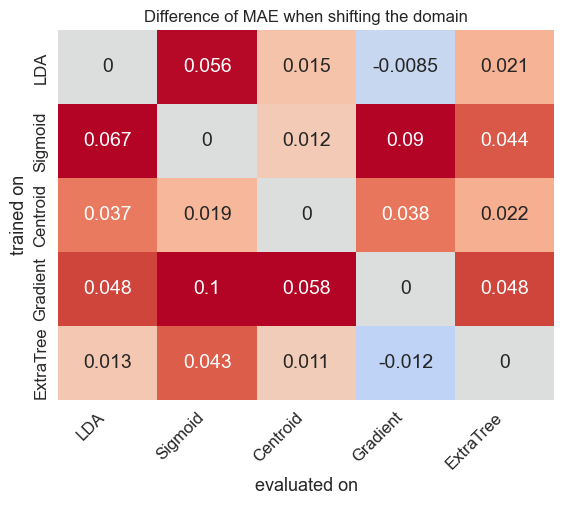

In [11]:
diff_matrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        diff_matrix[i][j] = MAE_matrix[i][j] - MAE_matrix[i][i]
print(diff_matrix)
# labels = labels[0:7]
plot = sns.heatmap(diff_matrix, 
            cmap="coolwarm",
            annot=True,
            annot_kws={"size": 14},
            vmax= 0.057,
            center=0.0,
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plot.xaxis.label.set_size(13)
plot.yaxis.label.set_size(13)
name = "Difference of MAE when shifting the domain"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['LDA', 'Sigmoid', 'Centroid', 'Gradient', 'ExtraTree']


C:\Users\maxso\AppData\Local\Temp\ipykernel_25480\56698155.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


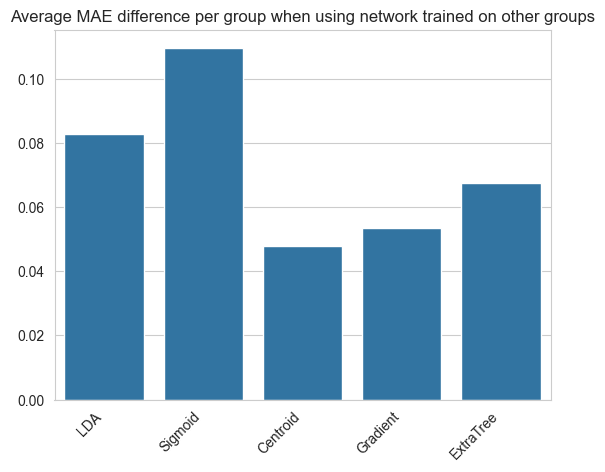

In [21]:
error_per_evaluated = np.sum(diff_matrix, axis=0)/2 #This is done as the evaluation by itself would be included is np.average is used
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_25480\3550454815.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


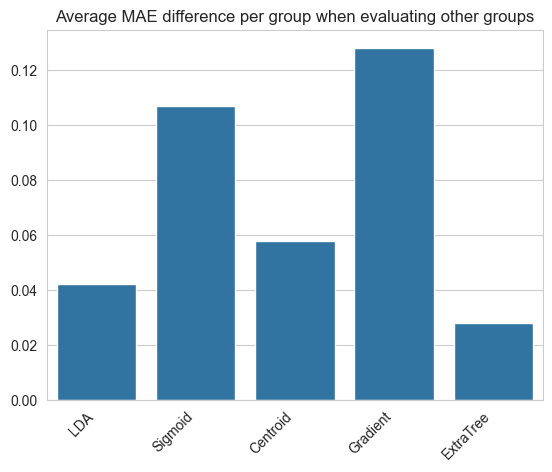

In [22]:
error_per_trained = np.sum(diff_matrix, axis=1)/2
plot = sns.barplot(x=labels, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

In [18]:
# diff_without_dummy = diff_matrix[0:7, 0:7]
# labels_without_dummy = labels[0:7]
# error_per_evaluated = np.sum(diff_without_dummy, axis=0)/6
# # high = max(error_per_evaluated) * 1.05
# # low = min(error_per_evaluated) * 0.95
# plot = sns.barplot(x=labels_without_dummy, y=error_per_evaluated)
# print(labels)
# # plt.ylim([low, high])
# plot.set_xticklabels(labels= labels, rotation=45, ha="right")
# name = "Average MAE difference per group when using network trained on other groups ignoring Dummy"
# plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
# plt.show()

In [19]:
# error_per_trained = np.sum(diff_without_dummy, axis=1)/6
# plot = sns.barplot(x=labels_without_dummy, y=error_per_trained)
# plot.set_xticklabels(labels= labels, rotation=45, ha="right")
# name = "Average MAE difference per group when evaluating other groups ignoring dummy"
# plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
# plt.show()